In [2]:
# import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split


# Read the CSV

In [3]:
# import the data (obtained csv from Kaggle), describe data
data = pd.read_csv('data.csv').drop(columns='Unnamed: 0')
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
# show the data in a dataframe
data.head()
# data.dtypes

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

y = data["target"]
X = data.drop(columns=["target", 'song_title', 'artist'])


print("Shape: ", X.shape, y.shape)

Shape:  (2017, 13) (2017,)


# Create a Train Test Split

In [6]:
# Use sklearn's `train_test_split` to split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


## Pre-Processing

In [7]:
# scale the data using the MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Create and Train the Logistic Regression Model

In [8]:
# Create and fit the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
# Print the scores

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.5343915343915344
Testing Data Score: 0.5485148514851486


In [10]:
actual_vs_predicted = pd.DataFrame({
    'actual': y_test,
    'predicted': model.predict(X_test)
})#, columns='')

print(f'{len(actual_vs_predicted)} predictions')
print(f'{(actual_vs_predicted["actual"]!=actual_vs_predicted["predicted"]).sum()} WRONG predictions')

from sklearn.metrics import confusion_matrix
      
print(confusion_matrix(y_test, model.predict(X_test)))

505 predictions
228 WRONG predictions
[[123 118]
 [110 154]]


(1512, 13)


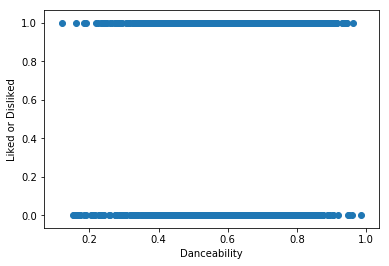

In [28]:
print(X_train.shape)
# plot the model scores
score_X = model.score(X_train, y_train)
score_y = model.score(X_test, y_test)
# plt.scatter(score_X, score_y)
plt.xlabel('Danceability')
plt.ylabel('Liked or Disliked')
plt.scatter(X_train['danceability'], y_train)

In [12]:
X_train['danceability']

1956    0.762
1877    0.640
944     0.816
1160    0.624
1849    0.814
650     0.836
1914    0.609
182     0.451
170     0.717
1944    0.524
590     0.787
1893    0.637
1664    0.591
857     0.462
272     0.609
1561    0.257
1530    0.371
1453    0.587
371     0.823
222     0.791
904     0.757
1760    0.780
1791    0.470
518     0.623
334     0.846
1582    0.534
1175    0.516
1813    0.763
607     0.648
15      0.637
        ...  
955     0.236
1215    0.810
385     0.839
805     0.535
1437    0.614
1515    0.535
343     0.388
769     0.771
1332    0.424
1685    0.351
130     0.547
1687    0.420
871     0.430
1123    0.725
1396    0.616
87      0.589
1482    0.766
330     0.760
1238    0.519
466     0.698
121     0.443
1638    0.605
1044    0.409
1724    0.829
1095    0.711
1130    0.385
1294    0.211
860     0.691
1459    0.633
1126    0.779
Name: danceability, Length: 1512, dtype: float64

In [13]:
from sklearn.feature_selection import SelectKBest, chi2
skb = SelectKBest(chi2, k=10)
skb.fit(X_train.drop(columns='loudness'), y_train)
skb.transform(X_test.drop(columns='loudness'))
# dropping the 'loudness' scores because they contain negative values

# create dataframe for top 10 scores
pd.DataFrame({
    'features': X_train.drop(columns='loudness').columns,
    'scores': skb.scores_
}).nlargest(10, 'scores')


,features,scores
2,duration_ms,982599.379695
4,instrumentalness,25.029778
9,tempo,21.454069
5,key,10.004465
0,acousticness,8.932943
7,mode,3.854390
8,speechiness,3.395459
11,valence,2.127821
1,danceability,1.842989
3,energy,0.121477


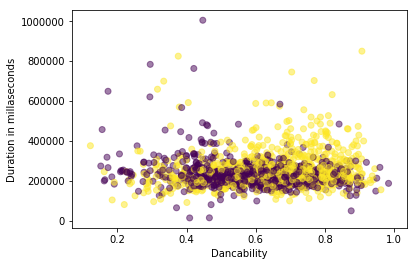

In [14]:
# plot dancability vs. duration in milleseconds of a song
plt.scatter(X_train['danceability'], X_train['duration_ms'], c=y_train, alpha=0.5)
plt.xlabel('Dancability')
plt.ylabel('Duration in millaseconds')
plt.show()

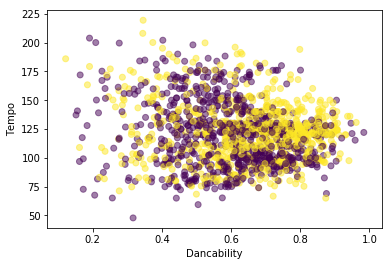

In [15]:
# plot the dancability vs. tempo of a song
plt.scatter(X_train['danceability'], X_train['tempo'], c=y_train, alpha=0.5)
plt.xlabel('Dancability')
plt.ylabel('Tempo')
plt.show()

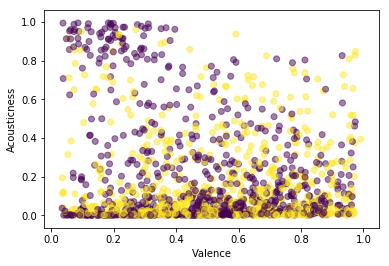

In [16]:
# plot valence (emotional component) vs. acousticness
plt.scatter(X_train['valence'], X_train['acousticness'], c=y_train, alpha=0.5)
plt.xlabel('Valence')
plt.ylabel('Acousticness')
plt.show()

In [17]:
# fit the scaled model

model2 = LogisticRegression()
model2.fit(X_train_scaled, y_train)

C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
# print the scaled scores

print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.666005291005291
Testing Data Score: 0.6435643564356436


In [29]:
# Use our model to predict a value
predicted = model.predict(X_test[:100])
predicted

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [30]:
y_test

1555    0
526     1
393     1
1788    0
433     1
1159    0
1090    0
429     1
1801    0
530     1
1208    0
1454    0
1910    0
1619    0
1022    0
678     1
1477    0
124     1
1900    0
462     1
1858    0
1971    0
1001    1
1728    0
1974    0
1299    0
1593    0
1242    0
544     1
1558    0
       ..
445     1
599     1
824     1
1652    0
1418    0
1323    0
978     1
415     1
273     1
736     1
1497    0
1466    0
250     1
413     1
620     1
1317    0
1776    0
310     1
777     1
381     1
561     1
425     1
1891    0
534     1
757     1
771     1
1366    0
408     1
1626    0
1601    0
Name: target, Length: 505, dtype: int64

In [20]:
X_test[:10]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1555,0.748000,0.520,341667,0.0748,0.633000,8,0.1020,-24.477,1,0.0497,107.327,4.0,0.134
526,0.072600,0.739,386907,0.5260,0.000000,4,0.2150,-7.384,0,0.1010,143.948,4.0,0.374
393,0.002100,0.646,219754,0.8920,0.006260,10,0.1170,-5.015,1,0.0331,119.998,4.0,0.935
1788,0.789000,0.664,145707,0.3200,0.000000,4,0.1520,-7.356,1,0.0322,141.916,3.0,0.710
433,0.019800,0.517,245013,0.4910,0.000001,11,0.0786,-13.742,0,0.0341,104.996,4.0,0.331
1159,0.281000,0.718,214867,0.6090,0.000033,0,0.2340,-4.699,0,0.0429,122.948,4.0,0.470
1090,0.270000,0.639,307910,0.8690,0.000000,11,0.0802,-4.024,1,0.1470,169.801,4.0,0.766
429,0.057100,0.502,287827,0.6320,0.054000,4,0.2260,-9.971,0,0.2710,82.738,4.0,0.207
1801,0.063700,0.406,224848,0.6380,0.000000,9,0.1070,-6.085,0,0.1300,177.916,4.0,0.404
530,0.000078,0.351,141305,0.9310,0.129000,6,0.2260,-5.746,0,0.0539,126.394,4.0,0.604


In [21]:
#y_test[:10]

In [33]:
predicted = model2.predict(X_test[:200])
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [32]:
y_test[:100]

1555    0
526     1
393     1
1788    0
433     1
1159    0
1090    0
429     1
1801    0
530     1
1208    0
1454    0
1910    0
1619    0
1022    0
678     1
1477    0
124     1
1900    0
462     1
1858    0
1971    0
1001    1
1728    0
1974    0
1299    0
1593    0
1242    0
544     1
1558    0
       ..
1755    0
859     1
1336    0
1338    0
1229    0
1406    0
1173    0
1061    0
628     1
411     1
1657    0
535     1
1983    0
1318    0
1517    0
69      1
1125    0
554     1
974     1
1940    0
1825    0
1516    0
581     1
1752    0
1901    0
721     1
1193    0
1746    0
785     1
1089    0
Name: target, Length: 100, dtype: int64

# Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [25]:
grid.fit(X_train, y_train)

C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\quint\Anacond

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.6805555555555556, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.6607142857142857, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.6329365079365079, total=   0.0s
[CV] C=1, penalty=l2 .................................................

C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 


[CV] ........ C=1, penalty=l2, score=0.5158730158730159, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ........ C=1, penalty=l2, score=0.5297619047619048, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ........ C=1, penalty=l2, score=0.5753968253968254, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ........ C=5, penalty=l1, score=0.6666666666666666, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ........ C=5, penalty=l1, score=0.6587301587301587, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ........ C=5, penalty=l1, score=0.6309523809523809, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ........ C=5, penalty=l2, score=0.5158730158730159, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] 

C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.6646825396825397, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ....... C=10, penalty=l1, score=0.6567460317460317, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] .................... C=10, penalty=l1, score=0.625, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.5158730158730159, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.5297619047619048, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.5753968253968254, total=   0.0s


C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished
C:\Users\quint\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l1'}
0.658068783068783
